Rt [0.55555556 1.         1.44444444]
β [5.99147337e-09 1.07846521e-08 1.55778308e-08]
ε [0.35460993 0.35460993 0.35460993]
γ [0.15151515 0.15151515 0.15151515]


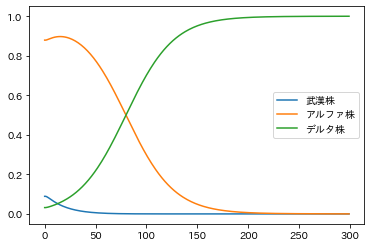

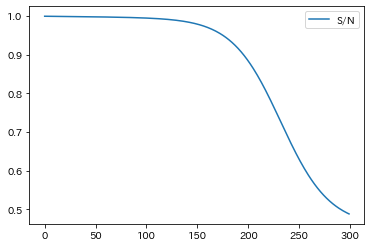

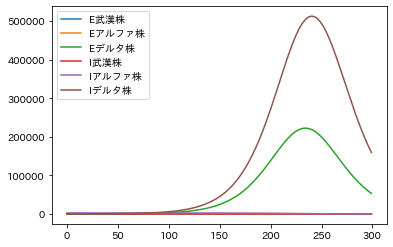

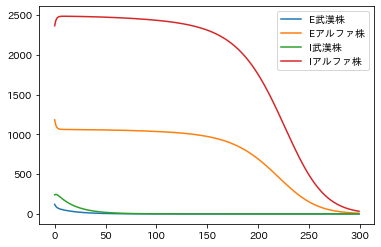

In [45]:
# とりあえず、日本語が使えればいい！
!pip install japanize-matplotlib &> /dev/null


import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

#基本設定
GROUPS=["武漢株","アルファ株","デルタ株"]
ONES=np.ones_like(GROUPS, dtype=np.float64)
ZEROS=np.zeros_like(GROUPS, dtype=np.float64)

#SIRモデル定数
N=14049146
R0=np.array([2.5,4.5,6.5]) # cf. https://www.bbc.com/japanese/features-and-analysis-57710818
Rt=R0/np.sum(R0)#R0の各要素合計で割る．sum(Rt)=1
Rt=Rt*3 #全体のRtを決める
ε=ONES/(4.82-2) # ε=1/(潜伏期間-2日)
#γ=世代時間+2 と考え，世代時間を4.6日とした
γ=ONES/(4.6+2)
β=ONES*Rt*γ/N

print("Rt",Rt)
print("β",β)
print("ε",ε)
print("γ",γ)

#SIRモデル変数初期値
#N=14049146
I=[np.array([(1-0.879-0.032),0.879,0.032])*2689.0]
E=[I[-1]*0.5]
S=[N-sum(E[-1])-sum(I[-1])] #6.7-6.13のスクリーニング検査結果をN501Y=アルファ，L452R=デルタとした．https://www.fukushihoken.metro.tokyo.lg.jp/iryo/kansen/corona_portal/henikabu/screening.html
R=[0.]

def calc(s, e, i ,r):
    #差分の計算
    ds=-β*i*s #sはグループに分かれていない
    de=β*i*s-ε*e
    #print("-ε*e=",ε*e)
    #print("β*i*s",β*i*s)
    #print("de",de)
    di=ε*e-γ*i
    dr=γ*i

    #差分を適用した値を返す
    return s+np.sum(ds), e+de, i+di, r+np.sum(dr)

def run(S, E, I, R, TMAX=300):
    s=S[-1]
    e=E[-1]
    i=I[-1]
    r=R[-1]
    for t in range(1,TMAX):
        #print(t,'s',s,'e',e,'i',i,'r',r)
        s,e,i,r=calc(s, e, i, r)
        S.append(s)
        E.append(e)
        I.append(i)
        R.append(r)
        #print(t,'N/N=', (s+sum(e)+sum(i)+r)/N)
    #print('TMAX',TMAX,'s',S[-1],'e',E[-1],'i',I[-1],'r',R[-1])
    return S, E, I, R

S, E, I, R=run(S, E, I, R, 300)

plt.plot([i[0]/sum(i) for i in I],label=GROUPS[0])
plt.plot([i[1]/sum(i) for i in I],label=GROUPS[1])
plt.plot([i[2]/sum(i) for i in I],label=GROUPS[2])
plt.legend()
plt.show()

plt.plot(np.array(S)/float(N),label='S/N')
plt.legend()
plt.show()

plt.plot([e[0] for e in E],label='E'+GROUPS[0])
plt.plot([e[1] for e in E],label='E'+GROUPS[1])
plt.plot([e[2] for e in E],label='E'+GROUPS[2])
plt.plot([i[0] for i in I],label='I'+GROUPS[0])
plt.plot([i[1] for i in I],label='I'+GROUPS[1])
plt.plot([i[2] for i in I],label='I'+GROUPS[2])
#plt.plot(R,label='R')
plt.legend()
plt.show()
plt.plot([e[0] for e in E],label='E'+GROUPS[0])
plt.plot([e[1] for e in E],label='E'+GROUPS[1])
plt.plot([i[0] for i in I],label='I'+GROUPS[0])
plt.plot([i[1] for i in I],label='I'+GROUPS[1])
#plt.plot(R,label='R')
plt.legend()
plt.show()